<h2><center>Applied Machine Learning - Assignment 5</center></h2>
<h4><center>Lorenzo Cirac Monteagduo</center></h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

<h3>Instructions</h3>
<p>You are required to pre-process the given datasets as follows:</p>
<ol>
    <li>Convert any non-numeric values to numeric values. For example, you can replace a country name with an integer value or use one-hot encoding. (Hint: use hashmap (dict) or
pandas.get dummies). Please explain your solution.</li>
    <li>If required, drop rows with missing values or NA.</li>
    <li> Split the data into a train (80%) and test (20%) set.</li>
    <li>Normalize the data.</li>
</ol>
<h4>Classification Dataset</h4>
<p>Bank Marketing Dataset: Use bank.csv from https://archive.ics.uci.edu/ml/datasets/
Bank+Marketing</p>

<h4>Regression Dataset</h4>
<p>Wine Quality Dataset: Available at http://archive.ics.uci.edu/ml/datasets/Wine+
Quality</p>

<p>We will use the min-max-normalization to normalize our datasets:</p>

In [2]:
def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

<h4>Data Preprocessing - Classification Dataset</h4>

In [3]:
bank = pd.read_csv('res/bank.csv', sep = ';')

<p>First, we will replace the values of the binary columns (yes/no) to numeric values. Following that, we’ll apply one-hot encoding to transform categorical data into binary variables, allowing us to handle non-numeric data in a structured format. Setting drop_first=True eliminates one category per feature to avoid redundancy and prevent multicollinearity, where one category could be inferred from the others.</p>

In [4]:
binary_columns = ['default', 'housing', 'loan', 'y']
for c in binary_columns:
    bank[c] = bank[c].map({'no': 0.0 , 'yes': 1.0})

category_columns = ['job', 'marital', 'education', 'contact', 'day', 'month', 'campaign', 'poutcome']
bank = pd.get_dummies(bank, columns = category_columns, drop_first = True).astype(float)

<p>Now, we will check our data for missing values:</p>

In [5]:
print(f"Amount of missing values: {bank.isna().sum().sum()}")

Amount of missing values: 0


Finally, we can normalize our data:

In [6]:
bank = bank.apply(normalize)

<h4>Data Preprocessing - Regression Dataset</h4>

In [7]:
red_wine = pd.read_csv('res/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('res/winequality-white.csv', sep = ';')

<p>Both DataFrames contain the same columns; the only distinguishing factor is the type of wine. Therefore, we will introduce a new boolean variable into each DataFrame to indicate whether the wine is red or white. After adding this variable, we can concatenate the two DataFrames.</p>

In [8]:
red_wine['type'] = 1.0
white_wine['type'] = 0.0

In [9]:
wine = pd.concat([red_wine, white_wine], ignore_index = True).astype(float)

<p>Now, we will check our data for missing values:</p>

In [10]:
print(f'Amount of missing values: {wine.isna().sum().sum()}')

Amount of missing values: 0


<p>Finally, we can normalize our data:</p>

In [11]:
wine = wine.apply(normalize)

<h3>Data Splitting - Classification Dataset</h3>

In [12]:
bank = bank.sample(frac=1)

<p>Based on the description of the Bank Marketing dataset, our objective is to predict if the client will subscribe a term deposit.</p>

In [13]:
YBank = bank['y'].to_numpy()
XBank = bank.drop('y', axis = 1).to_numpy()

In [14]:
# Splitting Data into Train (80%) and Test (20%) Data
partition = round(0.8 * len(YBank))
XTrainBank, YTrainBank = XBank[:partition], YBank[:partition]
XTestBank, YTestBank = XBank[partition:], YBank[partition:]

<h3>Data Splitting - Regression Dataset</h3>

In [15]:
wine = wine.sample(frac = 1)

<p>Based on the description of the Wine Quality dataset, our objective is to predict the quality.</p>

In [16]:
YWine = wine['quality'].to_numpy()
XWine = wine.drop('quality', axis = 1).to_numpy()

In [17]:
# Splitting Data into Train (80%) and Test (20%) Data
partition = round(0.8 * len(YWine))
XTrainWine, YTrainWine = XWine[:partition], YWine[:partition]
XTestWine, YTestWine = XWine[partition:], YWine[partition:]

<h3>Question 1 - Regularization</h3>
<p>For each dataset given above:</p>
<ol>
    <li>
        Implement Ridge Regression using the mini-Batch Gradient Descent (mini-BGD) algorithm. Your algorithm should have three parameters:
        <ul>
            <li>Learning rate ($\alpha$)</li>
            <li>Regularization constant ($\lambda$)</li>
            <li>Batch size (batchsize)</li>
        </ul>
    </li>
    <li>You can use any strategy for selecting the learning rate, such as AdaGrad, Bold Driver, or
a fixed step size.</li>
    <li>Choose three values for $\alpha$ and $\lambda$ ranging from small to large. Keep a fixed batchsize of
50.</li>
    <li> Train your model for each combination of the selected values of $\alpha$ and $\lambda$. For each training
epoch (one pass over all mini-batches), record the RMSE on the training and test data.</li>
    <li>For each combination of $\alpha$ and $\lambda$, plot the RMSE for training and test sets over iterations.
[Hint: Plot $RMSE_{train}$ on the positive axis and $RMSE_{test}$ on the negative axis of the same
plot].</li>
</ol>

<h3>Ridge Regression with Gradient Descent - Explanation of the solution</h3>
<p>To implement ridge regression with mini-batch gradient descent, I used the following slides as a guide: </p>
<ul>
    <li>Regularization: https://www.ismll.uni-hildesheim.de/lehre/ml-15w/script/ml-04-A3-regularization.pdf</li>
    <li>Mini-Batch-GD: https://www.ismll.uni-hildesheim.de/lehre/prakAIML-16w/script/ml-01-1-Gradient-Methods.pdf</li>
</ul>
<p>Given the complexity of this task and the numerous intermediate steps involved, I chose to encapsulate the entire model within a single class. This structure enables clear organization and modularity. I will now outline and number each key intermediate step, allowing for easy identification and reference within the code.</p>
<h5>(1) fit</h5>
<p>Prepares data, adds bias term, and starts training using mini_BGD_regression</p>
<br>
<h5>(2) predict</h5>
<p>Returns predictions for test data using learned beta</p>
<br>
<h5>(3) mini_BGD_regression</h5>
<p>Trains the model with mini-batch gradient descent and tracks RMSE history for training and test data</p>
<br>
<h5>(4) ridgeReg_GD_obj & ridgeReg_GD_obj_gradient</h5>
<p>Implementation of the pseudo code from the slides</p>
<br>
<h5>(5) plot_train_vs_test_RMSE</h5>
<p>Visualizes training and test RMSE over iterations</p>
<br>
<h5>Learning rate</h5>
<p>I decided to use a fixed learning rate. It can perform well if carefully tuned.</p>

<h3>Ridge Regression with Gradient Descent - Solution</h3>

In [18]:
class RidgeRegression:
    
    def __init__(self, learning_rate, regularization, batch_size = 50, t_max = 1000, tolerance = 1e-3):
        self.learning_rate = learning_rate
        self.regularization = regularization
        self.batch_size = batch_size
        self.t_max = t_max
        self.tolerance = tolerance
        self.RMSE_history_train = []
        self.RMSE_history_test = []

    # (1)
    def fit(self, XTrain, YTrain, XTest, YTest):
        self.XTrain = np.c_[np.ones(XTrain.shape[0]), XTrain]
        self.YTrain = YTrain
        self.XTest = np.c_[np.ones(XTest.shape[0]), XTest]
        self.YTest = YTest
        self.beta = self.mini_BGD_regression(self.XTrain, self.YTrain)

    # (2)
    def predict(self):
        if self.beta is None:
            return np.zeros(self.XTest.shape[0])   
        return self.XTest @ self.beta

    # (3)
    def mini_BGD_regression(self, X, y):
        n, m = X.shape
        beta = np.zeros(m)
        gradient = np.zeros(m)
        prev_obj = float('inf')
        
        for t in range(self.t_max):
            
            # Shuffle data
            permutation = np.random.permutation(n)
            X_shuffled = X[permutation]
            y_shuffled = y[permutation] 

            # Mini-batch training
            for i in range(0, n, self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                Y_batch = y_shuffled[i:i + self.batch_size]

                gradient = self.ridgeReg_GD_obj_gradient(X_batch, Y_batch, beta, gradient)

                beta -= self.learning_rate * gradient

            # RMSE history for plotting
            self.RMSE_history_train.append(self.RMSE(self.XTrain, self.YTrain, beta))
            self.RMSE_history_test.append(self.RMSE(self.XTest, self.YTest, beta))

            # Convergence Criterion
            curr_obj = self.ridgeReg_GD_obj(self.XTrain, self.YTrain, beta)
            if abs(prev_obj - curr_obj) < self.tolerance:
                return beta
            prev_obj = curr_obj

        # print(f"\033[91mNot converged in {self.t_max} iterations.\033[0m")

    # (4)
    def ridgeReg_GD_obj(self, X, y, beta):
        return np.sum((y - X @ beta) ** 2) + self.regularization * np.sum((beta) ** 2)

    # (4)
    def ridgeReg_GD_obj_gradient(self, X, y, beta, gradient):
        gradient[0] = -2 * np.sum(y - X @ beta)
        for j in range(1, X.shape[1]):
            gradient[j] = -2 * (X[:, j] @ (y - X @ beta)) + 2 * self.regularization * beta[j]
        return gradient

    def RMSE(self, X, y, beta):
        return np.sqrt(np.mean((y - X @ beta) ** 2))

    # (5)
    def plot_train_vs_test_RMSE(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(self.RMSE_history_train)), self.RMSE_history_train, label = 'Training RMSE', color = 'blue')
        plt.plot(range(len(self.RMSE_history_test)), [-rmse for rmse in self.RMSE_history_test], label = 'Test RMSE', color = 'red')

        # Dispaly final values
        last_train_rmse = self.RMSE_history_train[-1]
        last_test_rmse = -self.RMSE_history_test[-1]
        plt.annotate(f'{last_train_rmse:.4f}', 
            xy=(len(self.RMSE_history_train) - 1, last_train_rmse),
            xytext=(-15, 5), textcoords = 'offset points', color = 'blue', fontsize = 10)
        plt.annotate(f'{last_test_rmse:.4f}', 
            xy=(len(self.RMSE_history_test) - 1, last_test_rmse),
            xytext=(-15, -15), textcoords = 'offset points', color = 'red', fontsize = 10)
    
        plt.xlabel('Iterations')
        plt.ylabel('RMSE')
        plt.title(f'Training vs Test RMSE Over Iterations | learning_rate = {self.learning_rate} | regularization = {self.regularization}')
        plt.legend()
        plt.grid(True)
        plt.show()

<h3>Training Results - Regression Dataset</h3>
<ul>
    <li>$\alpha$ (learning_rates): 0.0001, 0.00001, 0.000001</li>
    <li>$\lambda$ (regularizations): 1, 10, 100</li>
</ul>

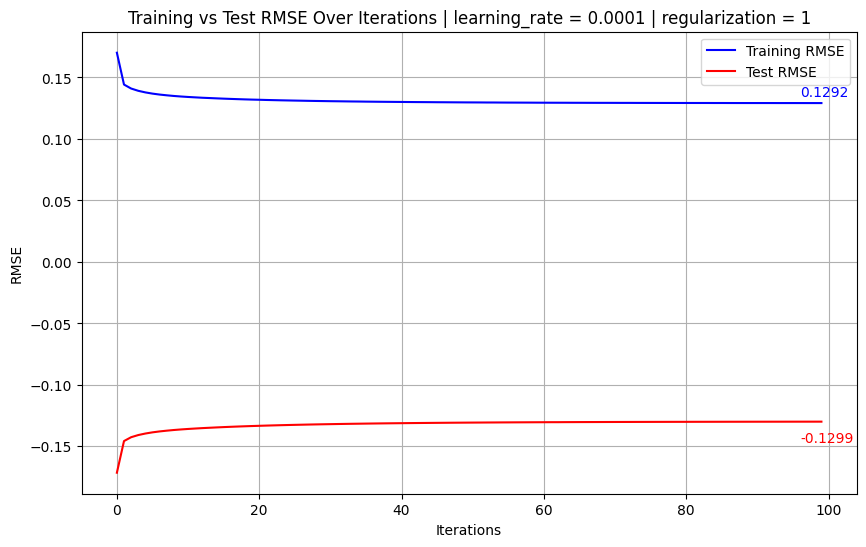

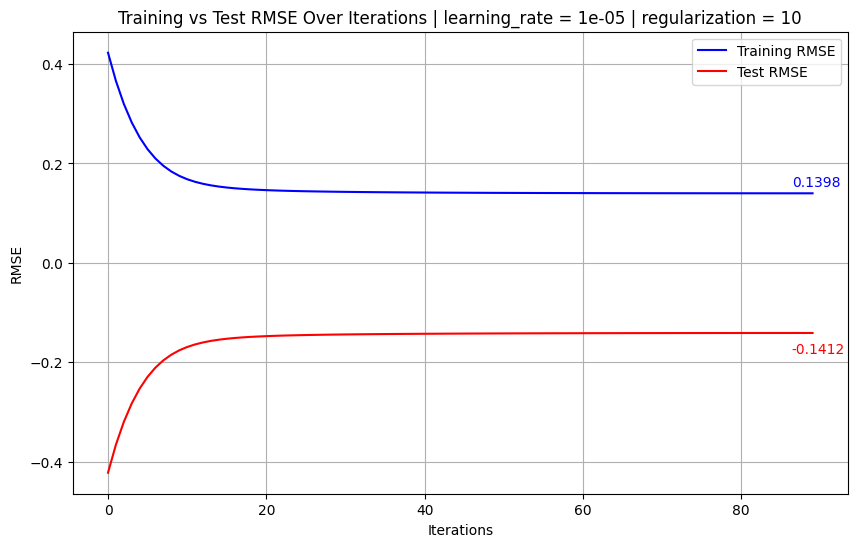

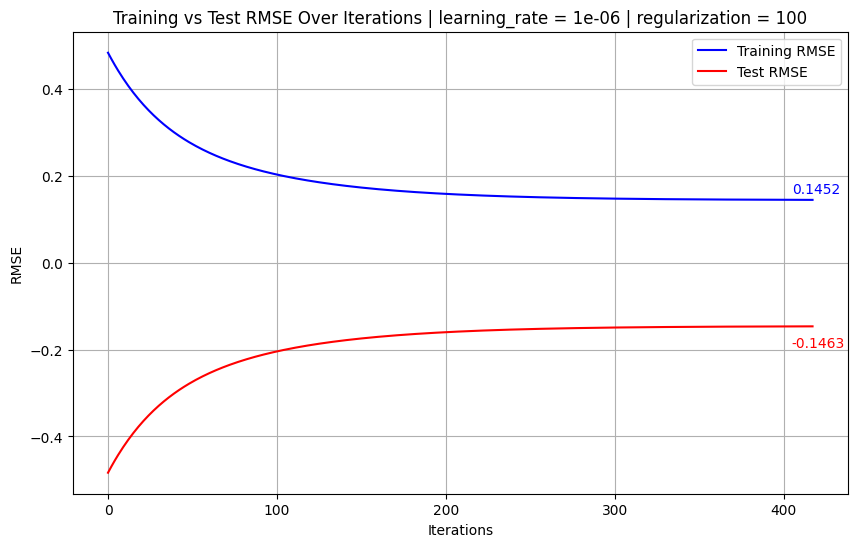

In [19]:
learning_rate = [0.0001, 0.00001, 0.000001]
regularization = [1, 10, 100]

for i in range(3):
    model = RidgeRegression(learning_rate = learning_rate[i], regularization = regularization[i])
    model.fit(XTrainWine, YTrainWine, XTestWine, YTestWine)
    model.plot_train_vs_test_RMSE()

<h3>L2-Regularized Logistic Regression with Gradient Descent - Explanation of the solution</h3>
<p>To implement ridge regression with mini-batch gradient descent, I used the following slides as a guide: </p>
<ul>
    <li>Regularization: https://www.ismll.uni-hildesheim.de/lehre/ml-15w/script/ml-04-A3-regularization.pdf</li>
    <li>Mini-Batch-GD: https://www.ismll.uni-hildesheim.de/lehre/prakAIML-16w/script/ml-01-1-Gradient-Methods.pdf</li>
</ul>
<p>Given the complexity of this task and the numerous intermediate steps involved, I chose to encapsulate the entire model within a single class. This structure enables clear organization and modularity. I will now outline and number each key intermediate step, allowing for easy identification and reference within the code.</p>
<h5>(1) fit</h5>
<p>Prepares data, adds bias term, and starts training using mini_BGD_regression</p>
<br>
<h5>(2) predict</h5>
<p>Returns predictions for test data using learned beta</p>
<br>
<h5>(3) mini_BGA_logreg</h5>
<p>Trains the model with mini-batch gradient ascent and tracks logloss history for training and test data</p>
<br>
<h5>(4) gradient, logloss, p</h5>
<p>Implementation of the pseudo code from the slides</p>
<br>
<h5>(5) plot_train_vs_test_logloss</h5>
<p>Visualizes training and test logloss over iterations</p>
<br>
<h5>Learning rate</h5>
<p>I decided to use a fixed learning rate. It can perform well if carefully tuned.</p>

<h3>L2-Regularized Logistic Regression with Gradient Ascent - Solution</h3>

In [20]:
class RegularizedLogisticRegression:
    
    def __init__(self, learning_rate, regularization, batch_size = 50, t_max = 1000, tolerance = 1e-3):
        self.learning_rate = learning_rate
        self.regularization = regularization
        self.batch_size = batch_size
        self.t_max = t_max
        self.tolerance = tolerance
        self.logloss_history_train = []
        self.logloss_history_test = []

    # (1)
    def fit(self, XTrain, YTrain, XTest, YTest):
        self.XTrain = np.c_[np.ones(XTrain.shape[0]), XTrain]
        self.YTrain = YTrain
        self.XTest = np.c_[np.ones(XTest.shape[0]), XTest]
        self.YTest = YTest
        self.beta = self.mini_BGA_logreg(self.XTrain, self.YTrain)

    # (2)
    def predict(self, threshold=0.5): 
        probabilities = self.p(self.XTest @ self.beta)  
        predictions = (probabilities >= threshold).astype(int)  
        return predictions

    # (3)
    def mini_BGA_logreg(self, X, y):
        n, m = X.shape
        beta = np.zeros(m)
        gradient = np.zeros(m)
        
        # For convergence criterion
        prev_obj = float('inf')

        for t in range(self.t_max):
            
            # Shuffle data
            permutation = np.random.permutation(n)
            X_shuffled = X[permutation]
            y_shuffled = y[permutation] 

            # Mini-batch training
            for i in range(0, n, self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                Y_batch = y_shuffled[i:i + self.batch_size]

                gradient = self.gradient(X_batch, Y_batch, beta, gradient)
        
                beta += self.learning_rate * gradient

            # RMSE history for plotting
            self.logloss_history_train.append(self.log_loss(self.XTrain, self.YTrain, beta))
            self.logloss_history_test.append(self.log_loss(self.XTest, self.YTest, beta))
            
            curr_obj = self.log_likelihood(self.XTrain, self.YTrain, beta)
            if np.abs(curr_obj - prev_obj) < self.tolerance:
                return beta
            prev_obj = curr_obj
            
        # print(f"\033[91mNot converged in {self.t_max} iterations.\033[0m")
        return beta

    # (4)
    def p(self, z):
        return 1 / (1 + np.exp(-z))

    # (4)
    def log_likelihood(self, X, y, beta):
        likelihood = np.sum(y * (X @ beta) - np.log(1 + np.exp(X @ beta)))
        regularization = - self.regularization * np.sum(beta[1:] ** 2)
        return likelihood + regularization

    # (4)
    def gradient(self, X, y, beta, gradient):
        gradient[0] = np.sum(y - self.p(X @ beta))
        for j in range(1, X.shape[1]):
            gradient[j] = np.sum(X[:, j] * (y - self.p(X @ beta))) - 2 * self.regularization * beta[j]
        return gradient

    def log_loss(self, X, y, beta):
        z = X @ beta
        p = self.p(z)
        epsilon = 1e-15 
        log_loss = -np.mean(y * np.log(p + epsilon) + (1 - y) * np.log(1 - p + epsilon))
        return log_loss

    # (5)
    def plot_train_vs_test_logloss(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(self.logloss_history_train)), self.logloss_history_train, label = 'Training logloss', color = 'blue')
        plt.plot(range(len(self.logloss_history_test)), [-rmse for rmse in self.logloss_history_test], label = 'Test logloss', color = 'red')

        # Dispaly final values
        last_train_rmse = self.logloss_history_train[-1]
        last_test_rmse = -self.logloss_history_test[-1]
        plt.annotate(f'{last_train_rmse:.4f}', 
            xy=(len(self.logloss_history_train) - 1, last_train_rmse),
            xytext=(-15, 5), textcoords = 'offset points', color = 'blue', fontsize = 10)
        plt.annotate(f'{last_test_rmse:.4f}', 
            xy=(len(self.logloss_history_test) - 1, last_test_rmse),
            xytext=(-15, -15), textcoords = 'offset points', color = 'red', fontsize = 10)
    
        plt.xlabel('Iterations')
        plt.ylabel('logloss')
        plt.title(f'Training vs Test logloss Over Iterations | learning_rate = {self.learning_rate} | regularization = {self.regularization}')
        plt.legend()
        plt.grid(True)
        plt.show()

<h3>Training Results - Classification Dataset</h3>
<ul>
    <li>$\alpha$ (learning_rates): 0.001, 0.0001, 0.00001</li>
    <li>$\lambda$ (regularizations): 0.1, 1, 10</li>
</ul>

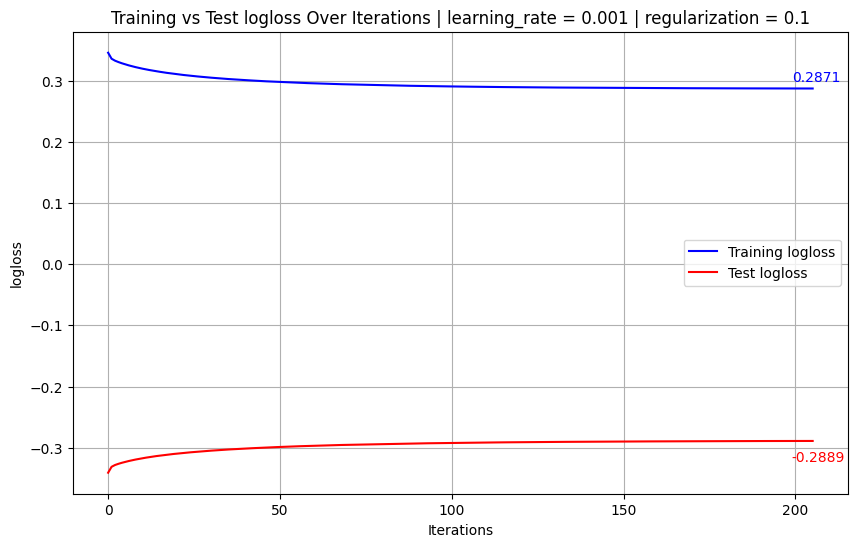

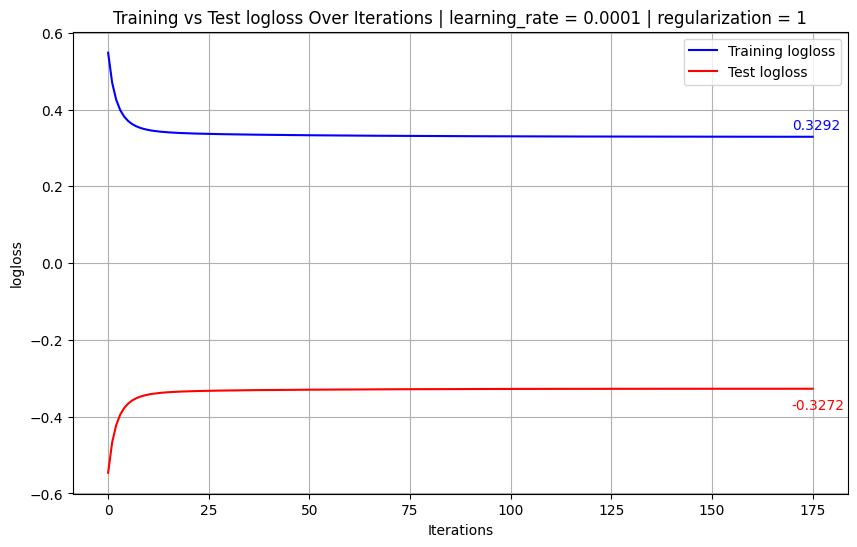

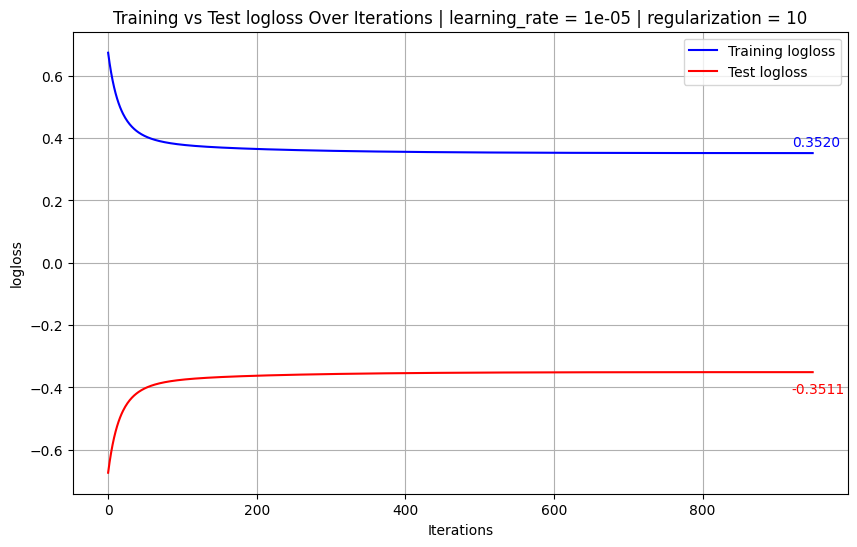

In [21]:
learning_rate = [0.001, 0.0001, 0.00001]
regularization = [0.1, 1, 10]

for i in range(3):
    model = RegularizedLogisticRegression(learning_rate = learning_rate[i], regularization = regularization[i])
    model.fit(XTrainBank, YTrainBank, XTestBank, YTestBank)
    model.plot_train_vs_test_logloss()

<h2>Exercise 2: Hyper-parameter Tuning and Cross-Validation</h2>
<p>In this section, you will implement grid search with k-fold cross-validation for model selection
(choosing the best hyperparameters):</p>
<ol>
    <li>Pick a range of $\alpha$ and $\lambda$ values defined on a grid. Use a fixed batchsize of 50.</li>
    <li> Implement the k-fold cross-validation protocol for grid search. For each combination of $\alpha$
and $\lambda$, perform k-fold cross-validation with k = 5.</li>
    <li>Keep track of the mean performance (i.e., $RMSE$ value) across k folds for each set of
hyperparameters. Plot $\alpha$ vs $\lambda$ with $RMSE$ scores for all combinations.
</li>
    <li>Finally, for the optimal values of $\alpha$ and $\lambda$, train your model on the complete training data
and evaluate on the test set.
</li>
    <li>Plot $RMSE_{train}$ and $RMSE_{test}$ over iterations. Compare your results with those from
previous plots.</li>
</ol>

<h3>k-fold cross-validation</h3>
<p>To implement k-fold cross-validation, I used the following slides as a guide:</p>
<ul>
    <li>https://www.ismll.uni-hildesheim.de/lehre/ml-15w/script/ml-04-A3-regularization.pdf</li>
</ul>

In [22]:
def k_fold_cross_validation(XTrain, YTrain, learning_rates, regularizations, method = 'regression', k = 5):
    
    if method == 'regression':
        results = np.zeros((len(learning_rates), len(regularizations)))
        loss_function = 'RMSE'
    elif method == 'classification':
        results = np.zeros((len(learning_rates), len(regularizations)))
        loss_function = 'Log Loss'

    fold_size = XTrain.shape[0] // k

    for i, learning_rate in enumerate(learning_rates):
        for j, regularization in enumerate(regularizations):
            loss_folds = []
            for fold in range(k):
                start, end = fold * fold_size, (fold + 1) * fold_size
                X_test, Y_test = XTrain[start:end], YTrain[start:end]
                X_train, Y_train = np.concatenate([XTrain[:start], XTrain[end:]], axis = 0), np.concatenate([YTrain[:start], YTrain[end:]], axis=0)
                
                if method == 'regression':
                    model = RidgeRegression(learning_rate = learning_rate, regularization = regularization)
                    model.fit(X_train, Y_train, X_test, Y_test)
                    
                    Y_prediction = model.predict()
                    loss_folds.append(np.sqrt(np.mean((Y_test - Y_prediction) ** 2)))
                elif method == 'classification':
                    model = RegularizedLogisticRegression(learning_rate = learning_rate, regularization = regularization)
                    model.fit(X_train, Y_train, X_test, Y_test)
                    
                    loss_folds.append(model.log_loss(model.XTest, model.YTest, model.beta))
            
            if method == 'regression':
                results[i, j] = np.mean(loss_folds)
            elif method == 'classification':
                results[i, j] = np.mean(loss_folds)

    # Plot results
    cmap = LinearSegmentedColormap.from_list('green_red', ['green', 'yellow', 'red'])
    plt.figure(figsize = (10,6))
    plt.imshow(results, cmap = cmap, aspect = 'auto')
    plt.colorbar(label=loss_function)
    plt.xticks(ticks = np.arange(len(regularizations)), labels = regularizations)
    plt.yticks(ticks = np.arange(len(learning_rates)), labels = learning_rates)
    plt.xlabel('Regularization')
    plt.ylabel('Learning Rate')
    plt.title(f'{loss_function} Heatmap for Learning Rates and Regularizations')
    plt.show()

    # Find the best combination of parameters
    min_loss_index = np.unravel_index(np.argmin(results), results.shape)
    best_learning_rate = learning_rates[min_loss_index[0]]
    best_regularization = regularizations[min_loss_index[1]]

    print(f'Best combination: Learning Rate = {best_learning_rate} | Regularization = {best_regularization} | {loss_function} = {results[min_loss_index]}')
    return best_learning_rate, best_regularization

<h3>Results - Regression Dataset</h3>

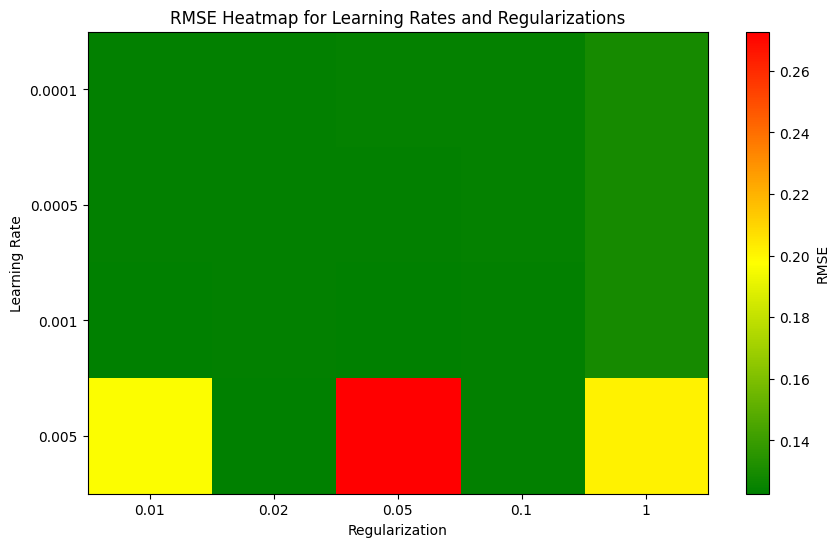

Best combination: Learning Rate = 0.005 | Regularization = 0.02 | RMSE = 0.1227183166381921


In [23]:
learning_rate, regularization = k_fold_cross_validation(XTrainWine, YTrainWine, [0.0001, 0.0005, 0.001, 0.005], [0.01, 0.02, 0.05, 0.1, 1], method = 'regression')

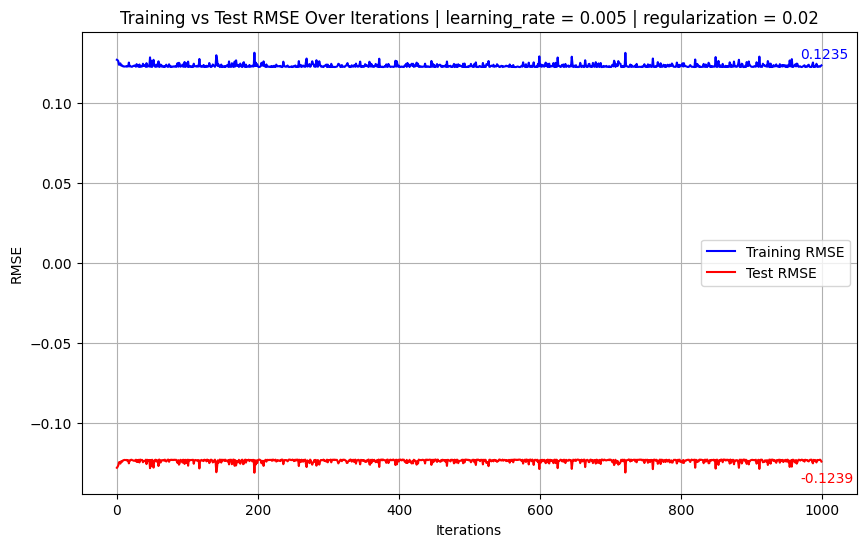

In [24]:
model = RidgeRegression(learning_rate = learning_rate, regularization = regularization)
model.fit(XTrainWine, YTrainWine, XTestWine, YTestWine)
model.plot_train_vs_test_RMSE()

<h3>Results - Classification Dataset</h3>

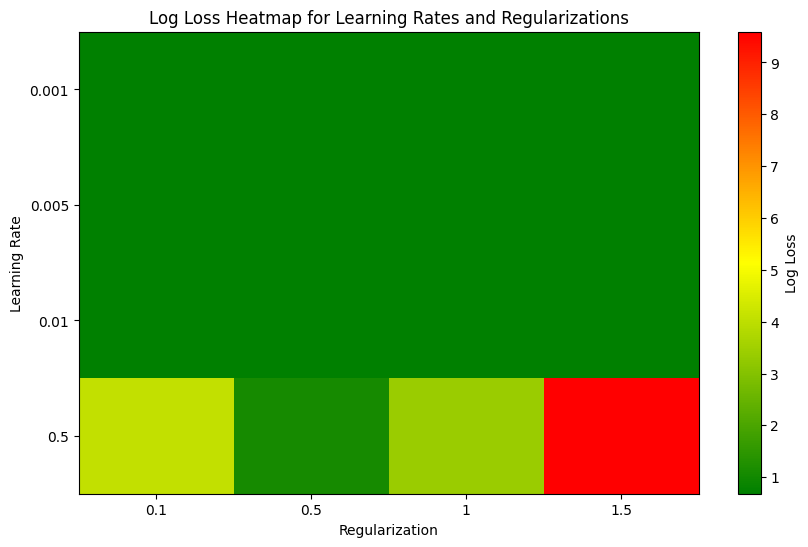

Best combination: Learning Rate = 0.01 | Regularization = 0.1 | Log Loss = 0.682057147852988


In [25]:
learning_rate, regularization = k_fold_cross_validation(XTrainWine, YTrainWine, [0.001, 0.005, 0.01, 0.5], [0.1, 0.5, 1, 1.5], method = 'classification')

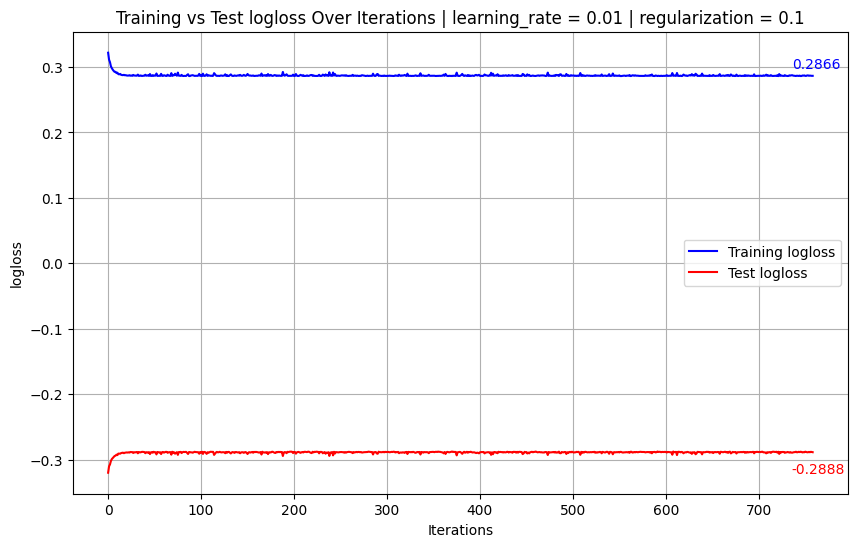

In [26]:
model = RegularizedLogisticRegression(learning_rate = learning_rate, regularization = regularization)
model.fit(XTrainBank, YTrainBank, XTestBank, YTestBank)
model.plot_train_vs_test_logloss()

<h3>Comparison</h3>
<p>As expected, k-fold cross-validation helps fine-tune hyperparameters, leading to improved model performance compared to earlier versions. By systematically evaluating different combinations of learning rates and regularization strengths, the approach ensures a robust selection of parameters that generalize well across unseen data, resulting in a more reliable and accurate model.</p>